## Oil Price Analysis

#### Importing necessary libraries

In [1]:
import os
import sys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt
import pmdarima as pm
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.seasonal.sarim
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style='whitegrid')
sns.set_context(context='paper',font_scale=1.5)

from scipy.signal import savgol_filter as smooth
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore', message="Could not infer format")

In [3]:
sys.path.append(os.path.abspath('../scripts'))
from Utils import DataUtils
from Plotting import Plots
from Logger import LOGGER
from timeseries_process import Timeseries, Utils

data_utils = DataUtils()
plots = Plots()
logger = LOGGER

time_utils = Utils()
timeseries = Timeseries()

In [4]:
# Loading data
events = data_utils.load_data('Calendar_Event.csv')
price = data_utils.load_data('BrentOilPrices.csv')

2024-11-06 09:43 - DEBUG :: Loading data from file...
2024-11-06 09:43 - DEBUG :: Loading data from file...


In [5]:
events['Date'] = events['Date'].apply(data_utils.convert_date_event)
price['Date'] = price['Date'].apply(data_utils.convert_date_price)

In [6]:
economic_indicators_price = price.merge(events, on="Date", how='left')
economic_indicators_price['Date'] = pd.to_datetime(economic_indicators_price['Date'], format= "%b %d, %Y")


In [7]:
# since the scraped data starts from 2007
price_with_indicators = economic_indicators_price.loc[economic_indicators_price['Date'].dt.year >= 2007]

#### Different scraped economical indicators

In [14]:
economic_indicators_price['title'].value_counts()

title
US Crude Oil Inventories          723
US Distillate Inventories         723
US Natural Gas Storage            723
US Gasoline Inventories           722
US Trade Balance                  167
US ISM Services PMI               166
CA Employment Change              166
CA Unemployment Rate              166
US ISM Manufacturing PMI          165
US Industrial Production m/m      165
EZ Consumer Confidence            165
US CPI m/m                        165
US Core CPI m/m                   165
US Retail Sales m/m               165
US Capacity Utilization Rate      165
US Factory Orders m/m             164
US Non-Farm Employment Change     162
US Unemployment Rate              162
US Average Hourly Earnings m/m    162
US Advance GDP q/q                 56
Name: count, dtype: int64

#### Economic indicators vs price

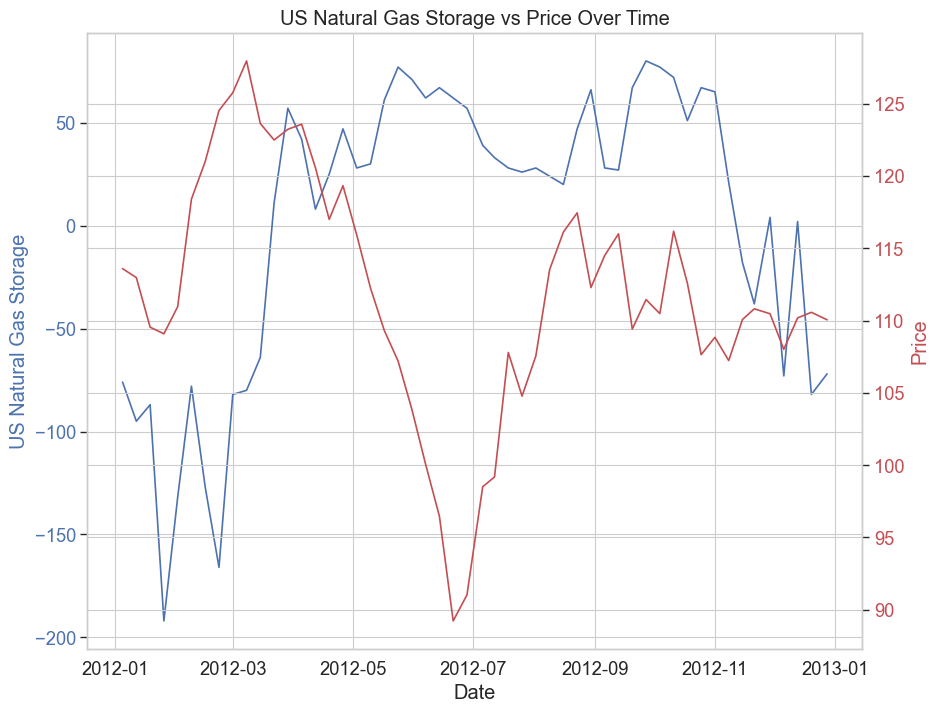

In [8]:
plots.compare_indicator_price('US Natural Gas Storage', price_with_indicators,2012)

**Observation**
- Inverse Relationship: The chart suggests a negative correlation between natural gas storage levels and prices. This means that as natural gas storage levels increase, the price tends to decrease, and vice versa.

**Interpretation:**
- When natural gas storage levels are high, it indicates a surplus of supply. This excess supply can lead to lower prices as suppliers may need to discount their product to encourage demand. Conversely, when storage levels are low, it indicates a potential shortage of supply. This can lead to higher prices as demand outstrips supply.


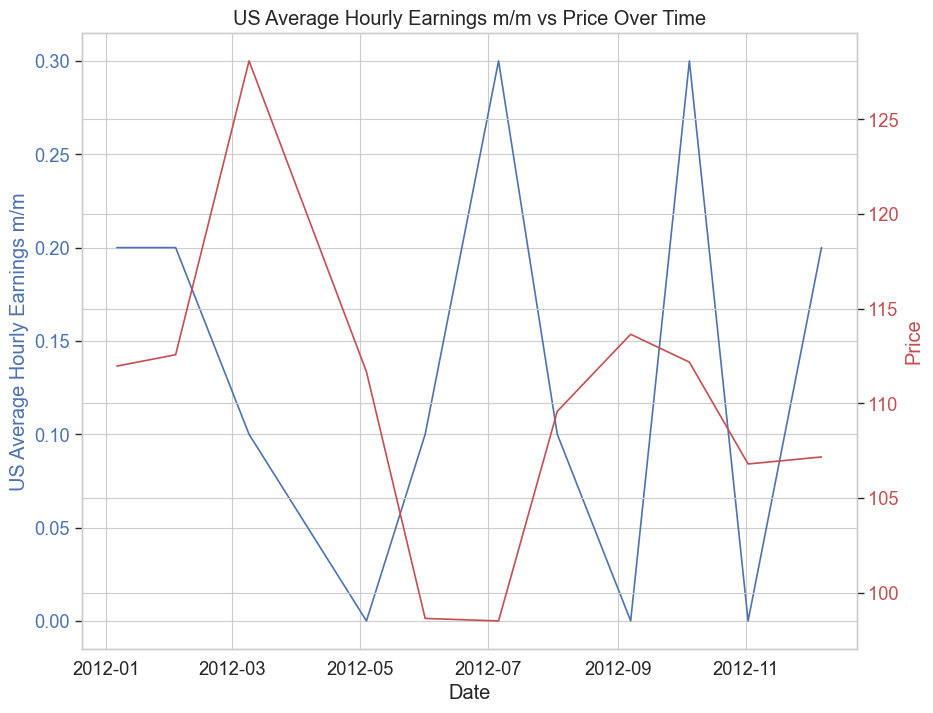

In [9]:
plots.compare_indicator_price('US Average Hourly Earnings m/m', price_with_indicators,2012)

**Observation**
- As Us Average Hour earnings decrease we can see that the oil price decreases

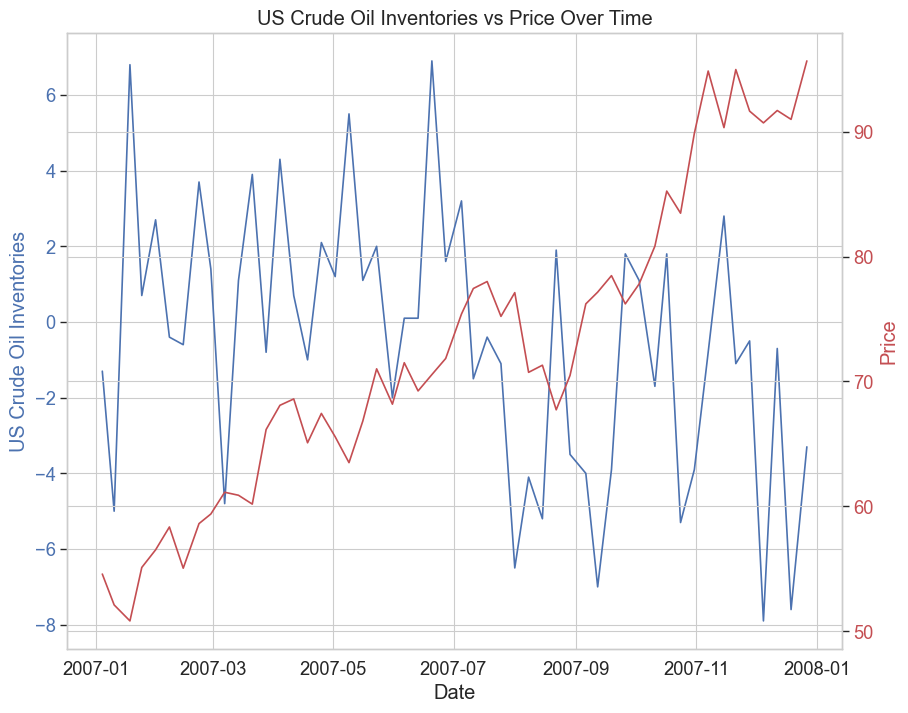

In [10]:
plots.compare_indicator_price('US Crude Oil Inventories', price_with_indicators,2007)

**Observation:**
- Inverse Relationship: There seems to be a negative correlation between crude oil inventories and price. This means that as inventories increase, the price tends to decrease, and vice versa.

**Interpretation:**
- When crude oil inventories are high, it indicates a surplus of supply. This excess supply can lead to lower prices as suppliers may need to discount their product to encourage demand. Conversely, when inventories are low, it signals a potential shortage of supply. This can lead to higher prices as demand outstrips supply.


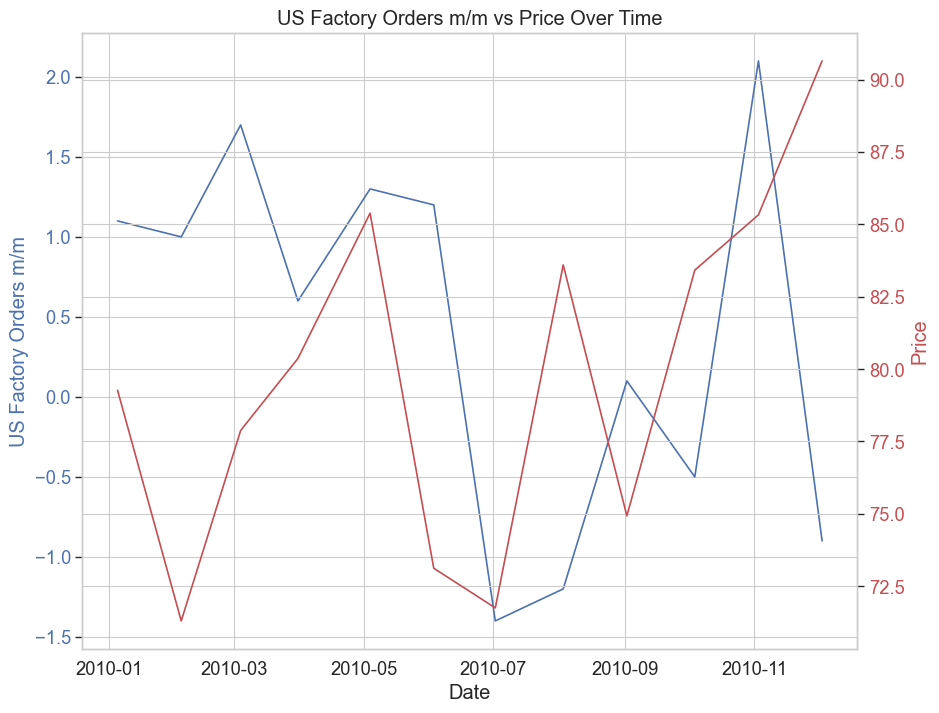

In [11]:
plots.compare_indicator_price('US Factory Orders m/m', price_with_indicators,2010)

**Observatoin**
- Potential Positive Correlation: While not perfectly aligned, there seems to be a weak positive correlation between the two series. This means that when factory orders increase, the price tends to increase as well, and vice versa. 

**Possible Explanations:**
- Demand and Supply Dynamics: Increased factory orders often indicate higher demand for goods. This increased demand can lead to higher prices, particularly if supply cannot keep up with demand.

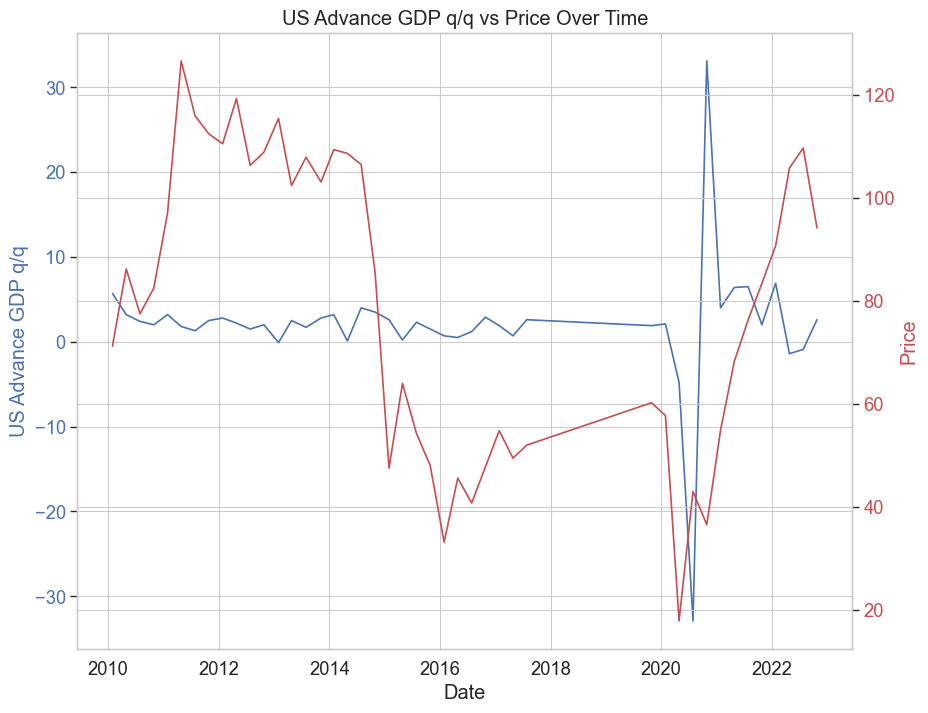

In [12]:
plots.compare_indicator_price('US Advance GDP q/q', price_with_indicators,2010, full_year = True)

**Observation**
- Weak Correlation: While there are periods where both series seem to move in the same direction, the overall correlation between the two is weak. This suggests that the relationship between GDP growth and price levels is complex and influenced by various factors.

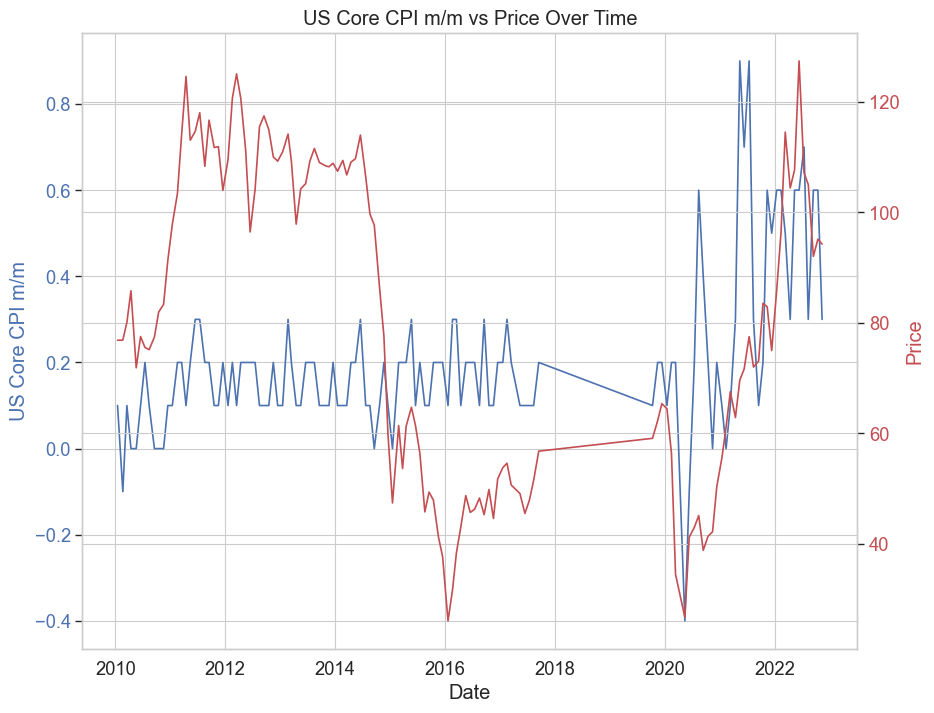

In [13]:
plots.compare_indicator_price('US Core CPI m/m', price_with_indicators,2010, full_year = True)

**Observation**
- Positive Correlation: There seems to be a positive correlation between the two series. This means that when the Core CPI m/m increases (indicating higher inflation), the price index also tends to increase, and vice versa.